# The Python Decal's Animation Guide

Animation is a great way to visualize a system's behavior. Also it looks really cool! This notebook was developed by Ayla Weitz, Emily Ma, and Raphael Baer-Way. A lot of the material in this notebook is adapted and modified from EPS 109 curriculum. All animations will be saved as video files in the directory of this notebook. So

## A Basic Matplotlib Animation

Before getting started, let's import the necessary libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

Let's start by animating something simple, a moving sine wave. First, we'll set up the figure.

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 3), ylim=(-3, 3))
line, = ax.plot([], [], lw=3)

Now we'll define some necessary functions. 

In [ ]:
# Plots the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(i):
    x = np.linspace(0, 3, 1000)
    y = 2 * np.sin(5 * np.pi * (x - 0.02 * i))  # try changing this function!
    line.set_data(x, y)
    return line,

With our functions defined we can run these two lines to get our animation! It will be saved as an mp4 file in whatever directory this notebook is in on your computer.

In [ ]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
anim.save('sine_wave_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

Try changing the frames and fps and see what happens! Matplotlib.animation.FuncAnimation documentation can be found here: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.animation.FuncAnimation.html

## 3D Animations in Matplotlib

To demonstrate how to create 3D animations using matplotlib, let's animate the heat equation. The heat equation is defined by:
    
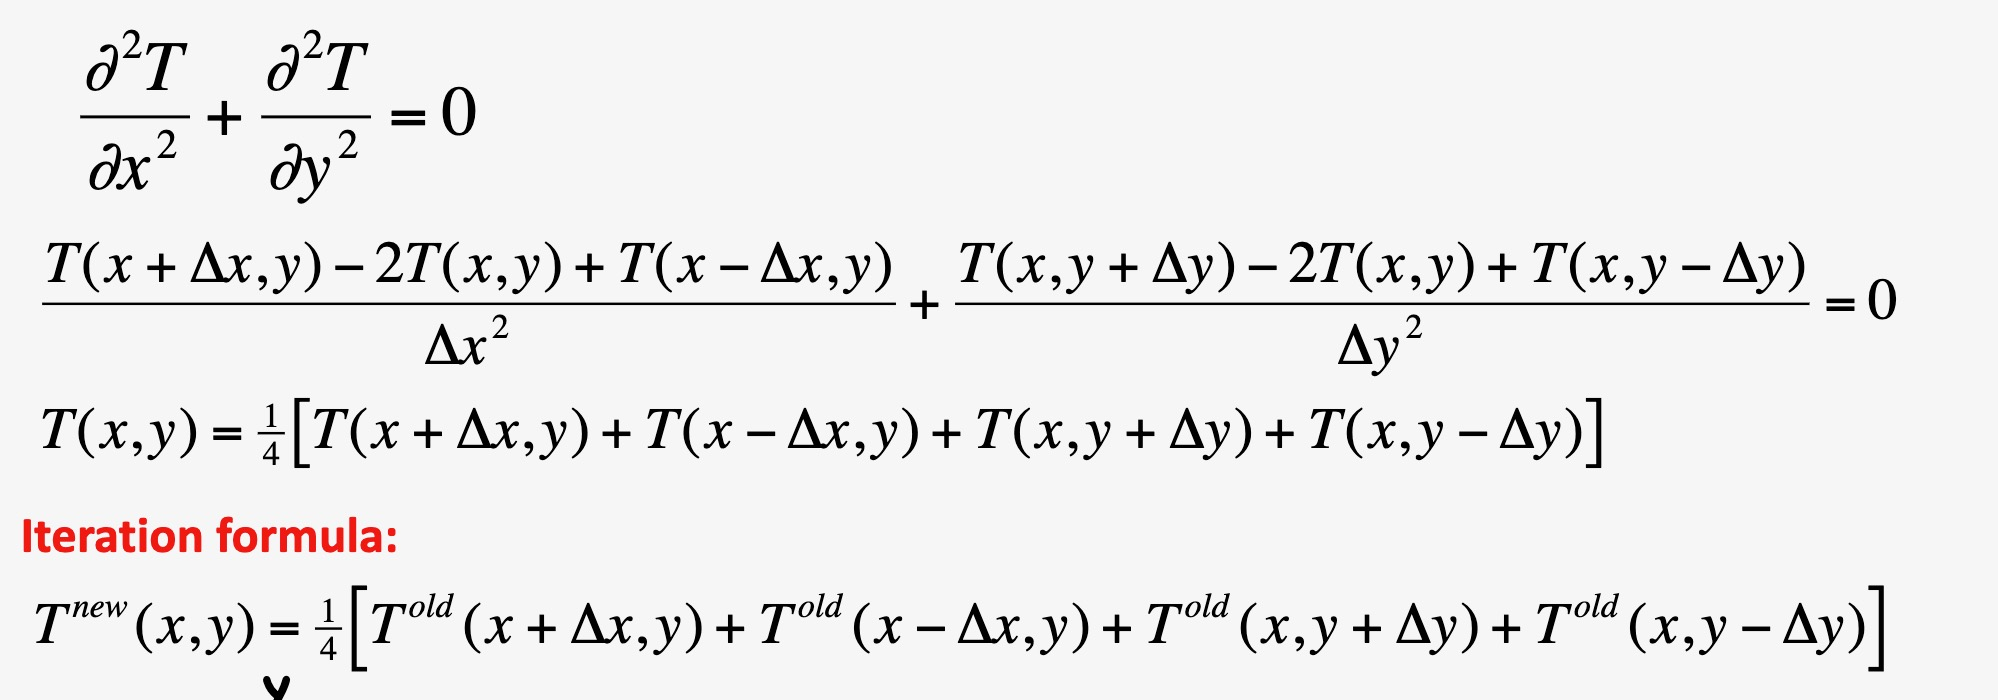

This formula is confusing so it's totally ok if you don't understand it! Just keep in mind when simulating a physical system to have a formula that is numerically iterable. 

Install FFMpegWriter
- mac: download from https://ffmpeg.org/download.html
- windows: download from https://ffmpeg.zeranoe.com/builds/

First, we'll import the neccessary libraries. If you are using a windows computer uncomment the commented line below

In [ ]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# uncomment the line below if using windows!
# plt.rcParams['animation.ffmpeg_path']=r'{file location string of the ffmpeg executable}'

from matplotlib.animation import FFMpegWriter
metadata = dict(title='My first animation in 3D', artist='Matplotlib')
writer = FFMpegWriter(fps=15, metadata=metadata,bitrate=200000)
fig = plt.figure(dpi=200)

Let's set the initial conditions

In [ ]:
N = 51  # number for segments
L = 10  # the length of the grid
T = np.array([np.zeros(N) for i in range(N)])  # an empty matrix

# initial conditions -- 'L' shape
T[5:-5, N//3-N//6:N//3+N//6] = 100
T[5:20, N//3-N//6: -10] = 100

iterations = 51  # number of iterations
X = np.linspace(0, L, N)
Y = np.linspace(0, L, N)
X, Y = np.meshgrid(X, Y)  # this creates a grid

Creating the initial figure and running the animation loop

In [ ]:
fig = plt.figure(dpi=200)

with writer.saving(fig, "heat.mp4", dpi=200):  # saves each state of the matrix as a frame
    for it in range(iterations):  # for each iteration it updates the matrix
        if (it%10==0): print(it,end='')
        print('.',end='')
        
        Tnew = np.copy(T)
        for i in range(N-1): # loop through the 2D matrix
            for j in range(N-1):
                
                # update matrix according to the heat equation (or other physical law)
                Tnew[i, j] = 0.25 * (Tnew[i+1, j] + Tnew[i-1, j] + Tnew[i, j+1] + Tnew[i, j-1])
                
                # impose boundary conditions
                Tnew[0, :], Tnew[:, 0], Tnew[-1, :], Tnew[:, -1] = 0, 0, 0, 0
                
        T = Tnew  # define new updated matrix as current matrix
        
        fig.clear()
        ax = fig.gca(projection='3d')  # 3D plot
        ax.set_zlim(0, 100)
        ax.set_title('2D Heat Equation ({} iterations)'.format(it))
        ax.plot_surface(X, Y, T, cmap=cm.coolwarm, antialiased=False) #
        plt.draw()
        plt.pause(0.01)  # runs the frame for 0.01 seconds
        writer.grab_frame()  # this saves the frame

Try changing to cmap=cm.coolwarm to cmap=cm.bone in line 24 in the cell above. Try other colormaps too! Check out this website for some more info: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

## Rotations

Let's create an animation with a rotating perspective! We'll rotate around our initial conditions of the previous heat animation.

In [ ]:
N = 51
L = 10
T = np.array([np.zeros(N) for i in range(N)])  # create an empty matrix

# initial conditions -- 'L' shape
T[5:-5, N//3-N//6:N//3+N//6] = 100
T[5:20, N//3-N//6: -10] = 100

X = np.linspace(0, L, N)
Y = np.linspace(0, L, N)
X, Y = np.meshgrid(X, Y)
fig = plt.figure(dpi=200)

with writer.saving(fig, "rotation.mp4", dpi=200):
    ax = fig.gca(projection='3d') # 3D plot
    ax.set_zlim(0, 100)
    ax.set_title('2D Heat Equation'.format(it))
    ax.plot_surface(X, Y, T, cmap=cm.coolwarm, antialiased=False)
    
    for angle in range(0, 180):  # cycle through set of angles
        ax.view_init(30, angle)
        plt.draw()
        plt.pause(0.001) # runs the frame for 0.001 seconds
        writer.grab_frame()

Now that we know how to create a rotation animation, let's rotate AND run the heat equation.

In [ ]:
N = 51
L = 10
T = np.array([np.zeros(N) for i in range(N)])  # create an empty matrix

# initial conditions -- 'L' shape
T[5:-5, N//3-N//6:N//3+N//6] = 100
T[5:20, N//3-N//6: -10] = 100

iterations = 81
X = np.linspace(0, L, N)
Y = np.linspace(0, L, N)
X, Y = np.meshgrid(X, Y)
fig = plt.figure(dpi=200)


angles = np.arange(0, 360)  # define angle range
index = 0
 
with writer.saving(fig, "heat_rotation.mp4", dpi=200):  # saves each state of the matrix as a frame
    for it in range(iterations):  # for each iteration it updates the matrix
        if (it%10==0): print(it,end='')
        print('.',end='')
        
        Tnew = np.copy(T)
        for i in range(N-1): # loop through the 2D matrix
            for j in range(N-1):
                
                # update matrix according to the heat equation (or other physical law)
                Tnew[i, j] = 0.25 * (Tnew[i+1, j] + Tnew[i-1, j] + Tnew[i, j+1] + Tnew[i, j-1])
                
                # impose boundary conditions
                Tnew[0, :], Tnew[:, 0], Tnew[-1, :], Tnew[:, -1] = 0, 0, 0, 0
                
        T = Tnew  # define new updated matrix as current matrix
        
        fig.clear()
        ax = fig.gca(projection='3d')
        ax.set_zlim(0, 100)
        ax.set_title('2D Heat Equation ({} iterations)'.format(it))
        ax.plot_surface(X, Y, T, cmap=cm.coolwarm, antialiased=False)
        
        if index < len(angles):
            ax.view_init(30, angles[index])
            index += 1
        else:  # make sure it loops through angles
            ax.view_init(30, angles[index])
            index = 1
            
        plt.draw()
        plt.pause(0.01)
        writer.grab_frame()

## Vpython

Vpython is a really neat library for animating 3D objects in python. It's very specific and requires a lot of googling to use but it is pretty neat once you play with it. In order to use the library you have to install it either using anaconda or pip. They should both be equivalent. To install, type either of these lines below in your terminal.

Make sure you have the vpython module installed. 
- pip3 install vpython
- conda install -c vpython vpython

Once vpython is installed, let's import everything from it

In [ ]:
from vpython import *

### Animating an exoplanet orbiting a star-an example in Vpython

Generally, commands in vpython are quite specific(they follow no real specific syntax) and just require googling in order to find the specific commands you need. Below, an example of a planet orbiting a star is provided. You can zoom in and out with your mouse because its also interactive!

In [ ]:
scene=display(width=1000,height=1000,center=vector(0,5,0)) #make the display as wide or as tall as you like
HD218566=sphere(pos=vector(0,0,0),radius=100,color=color.red)# create a sphere
HD218566p=sphere(pos=vector(-200,-10,0),radius=10,make_trail=False) #create a smaller sphere
HD218566pv=vector(0,0,5.02) #make the smaller sphere have a velocity

for i in range(1000):
    rate(27) #rate allows you to change the rate at which the smaller sphere moves
    HD218566p.pos+=HD218566pv
    d=(HD218566p.pos.x**2+HD218566p.pos.y**2+HD218566p.pos.z**2)**0.5 #set a consistent distance from the planet
    radial_vector=(HD218566p.pos-HD218566.pos)/d
    Gravity=(-9420*radial_vector)/(d**2) #add gravity as a vector
    HD218566pv+=Gravity #add gravity to the velocity
    HD218566p.pos+=HD218566pv #finalize all additions

# Animating Fractals!


## Julia Set

Now let's animate a Julia Set! The Julia set is defined as the set of complex points $z_0$, for which the series does not diverge. A Julia Set is defined by the equation:

<center>$z_{n+1} = z_n^2 + c$
    
where c is a constant, and for each value of c a different julia set appears. This is a very pretty thing from math, so don't worry if you don't understand it extremely well. You can find countless youtube videos talking about the beauty in fractals, by all means please check them out! Numberphile and 3Blue1Brown have excellent videos on the subject.


In [ ]:
def mandelbrot(z, c):
    z_new = z**2 + c 
    return z_new

def is_div(z, c):
    for n in range(n_max):
        if abs(z) > n_max:
            return n
        z = mandelbrot(z, c)
    return n_max

This next code takes a while to run! You can try changing the ranges and step sizes for c1 and c2. We recommend staying within the range -3 to 3.

In [ ]:
# a -- Julia set
fig = plt.figure(dpi=200)

with writer.saving(fig, "julia.mp4", dpi=200):
#     for c1 in np.arange(-1,0,0.1):  # try changing this
    for c2 in np.arange(-2,2,0.1):  # try changing this
        c1 = -0.4
        c = complex(c1, c2)
        n = 501
        x_min, x_max = -1.5, 1.5
        y_min, y_max = -1.5, 1.5
        n_max = 50

        matrix = []
        x = []
        for i in range(n):
            i = x_min + i * (x_max - x_min) / (n - 1)
            x += [i]
        y = []
        for i in range(n):
            i = y_min + i * (y_max - y_min) / (n - 1)
            y += [i]

        for ix in x:
            column = []
            for iy in y:
                zo = complex(ix, iy)
                n = is_div(zo, c)
                column.append(n)
            matrix.append(column)

        plt.imshow(matrix)
        plt.draw()
        writer.grab_frame()